<a href="https://colab.research.google.com/github/Adarshkumar61/Deep_Learning_using_colab/blob/main/CNN_model_with__cifar10data_with_batchNorm_and_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [23]:
(x_train, y_train), (x_test, y_test)  = tf.keras.datasets.cifar10.load_data()

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
x_test.shape

(10000, 32, 32, 3)

In [24]:
print(x_train[0])


[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


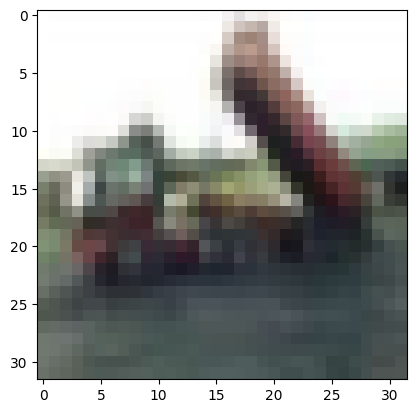

In [25]:
plt.imshow(x_train[2])

Normalizes Pixel Values

In [26]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Converted Class Vectors to Binary class metrics (One Hot Encoding)

In [27]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [28]:
model = models.Sequential()

Model Building

In [29]:
# BLOCK1:
model.add(layers.Conv2D(32, (3, 3), activation= 'relu', padding = 'same', input_shape = (32,32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), activation = 'relu', padding= 'same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.2))

# BLOCK2:
model.add(layers.Conv2D(64, (3,3), activation= 'relu', padding= 'same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), activation= 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.2))

#BLOCK3:
model.add(layers.Conv2D(128, (3,3), activation= 'relu', padding= 'same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), activation= 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.2))

#FULLY CONNECTED DENSE LAYER:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Compiling

In [30]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [31]:
model.fit(x_train, y_train, batch_size = 54, epochs = 10, validation_data = (x_test,y_test))

Epoch 1/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.4059 - loss: 1.7706 - val_accuracy: 0.6104 - val_loss: 1.1116
Epoch 2/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.6626 - loss: 0.9552 - val_accuracy: 0.6994 - val_loss: 0.8751
Epoch 3/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7244 - loss: 0.7877 - val_accuracy: 0.7350 - val_loss: 0.7606
Epoch 4/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7661 - loss: 0.6757 - val_accuracy: 0.7251 - val_loss: 0.8125
Epoch 5/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7915 - loss: 0.5940 - val_accuracy: 0.7949 - val_loss: 0.5988
Epoch 6/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8174 - loss: 0.5257 - val_accuracy: 0.8019 - val_loss: 0.5895
Epoch 7/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8354 - loss: 0.4693 - val_accuracy: 0.7904 - val_loss: 0.6207
Epoch 8/10
926/926 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8488 - loss: 0.4365 - val_accura

In [32]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose =2, batch_size= 54)

186/186 - 1s - 4ms/step - accuracy: 0.7856 - loss: 0.6665


In [33]:
print('test acc is :', test_acc)

test acc is : 0.7856000065803528


predict a image

In [37]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Text(0.5, 1.0, 'predicted: frog, Actual: frog')

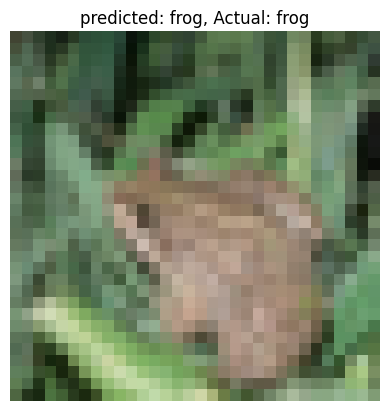

In [46]:
import numpy as np
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


img_index = 4
img = x_test[img_index]

plt.imshow(img)
plt.axis('off')

prediction = model.predict(np.expand_dims(img, axis=0))
predicted = np.argmax(prediction)

actual_class = y_test[img_index]
plt.title(f'predicted: {class_names[predicted]}, Actual: {class_names[np.argmax(actual_class)]}')

In [47]:
print(f' actual class is : {class_names[np.argmax(actual_class)]}')

 actual class is : frog


In [48]:
print(f'predicted by model is : {class_names[predicted]}')

predicted by model is : frog
